# Neural Networks with PyTorch - Complete Tutorial

## What are Neural Networks?

Neural networks are computational models inspired by biological neural networks. They consist of interconnected nodes (neurons) organized in layers that can learn complex patterns from data.

### Key Components:
1. **Neurons/Nodes**: Basic processing units
2. **Weights**: Parameters that determine the strength of connections
3. **Biases**: Additional parameters to help the model fit the data
4. **Activation Functions**: Non-linear functions that introduce complexity
5. **Layers**: Groups of neurons (input, hidden, output layers)

## PyTorch Fundamentals

PyTorch is a deep learning framework that provides:
- Dynamic computational graphs
- Automatic differentiation (autograd)
- GPU acceleration
- Rich ecosystem of tools

## 1. Tensor Basics

Tensors are the fundamental data structure in PyTorch - multi-dimensional arrays similar to NumPy arrays but with GPU support and automatic differentiation.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Creating tensors
print("=== Creating Tensors ===")

# From lists
tensor_from_list = torch.tensor([1, 2, 3, 4])
print(f"From list: {tensor_from_list}")

# Random tensors
random_tensor = torch.randn(2, 3)  # 2x3 matrix with random normal values
print(f"Random tensor:\n{random_tensor}")

# Zeros and ones
zeros = torch.zeros(2, 2)
ones = torch.ones(3, 3)
print(f"Zeros:\n{zeros}")
print(f"Ones:\n{ones}")

# Tensor operations
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

print(f"\nTensor a: {a}")
print(f"Tensor b: {b}")
print(f"Addition: {a + b}")
print(f"Element-wise multiplication: {a * b}")
print(f"Dot product: {torch.dot(a, b)}")

# Reshaping
matrix = torch.randn(6)
reshaped = matrix.view(2, 3)  # Reshape to 2x3
print(f"\nOriginal: {matrix}")
print(f"Reshaped (2x3):\n{reshaped}")

=== Creating Tensors ===
From list: tensor([1, 2, 3, 4])
Random tensor:
tensor([[ 2.5087,  0.4201,  0.9860],
        [-1.2786, -0.4211, -0.9050]])
Zeros:
tensor([[0., 0.],
        [0., 0.]])
Ones:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Tensor a: tensor([1., 2., 3.])
Tensor b: tensor([4., 5., 6.])
Addition: tensor([5., 7., 9.])
Element-wise multiplication: tensor([ 4., 10., 18.])
Dot product: 32.0

Original: tensor([-0.5279,  0.8655,  1.4878,  0.7364, -1.5065, -0.5967])
Reshaped (2x3):
tensor([[-0.5279,  0.8655,  1.4878],
        [ 0.7364, -1.5065, -0.5967]])


## 2. Automatic Differentiation (Autograd)

Autograd is PyTorch's automatic differentiation system. It automatically computes gradients for tensors, which is essential for training neural networks using backpropagation.

In [2]:
print("=== Automatic Differentiation ===")

# Create a tensor with gradient tracking
x = torch.tensor(2.0, requires_grad=True)
print(f"x = {x}")

# Define a function y = x^2 + 3x + 1
y = x**2 + 3*x + 1
print(f"y = x^2 + 3x + 1 = {y}")

# Compute gradient dy/dx
y.backward()
print(f"dy/dx = 2x + 3 = {x.grad}")  # Should be 2*2 + 3 = 7

# Example with multiple variables
x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(2.0, requires_grad=True)

# Function: z = x1^2 + x2^3
z = x1**2 + x2**3
z.backward()


print(f"\nFor z = x1^2 + x2^3:")
print(f"dz/dx1 = 2*x1 = {x1.grad}")  # Should be 2*1 = 2
print(f"dz/dx2 = 3*x2^2 = {x2.grad}")  # Should be 3*2^2 = 12


# Example with vectors
print("\n=== Vector Gradients ===")
x_vec = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y_vec = torch.sum(x_vec**2)  # Sum of squares
y_vec.backward()
print(f"x = {x_vec.data}")
print(f"y = sum(x^2) = {y_vec}")
print(f"dy/dx = 2x = {x_vec.grad}")  # Should be [2, 4, 6]

=== Automatic Differentiation ===
x = 2.0
y = x^2 + 3x + 1 = 11.0
dy/dx = 2x + 3 = 7.0

For z = x1^2 + x2^3:
dz/dx1 = 2*x1 = 2.0
dz/dx2 = 3*x2^2 = 12.0

=== Vector Gradients ===
x = tensor([1., 2., 3.])
y = sum(x^2) = 14.0
dy/dx = 2x = tensor([2., 4., 6.])


## 3. Neural Network Building Blocks

Let's explore the key components that make up neural networks:

=== Activation Functions ===


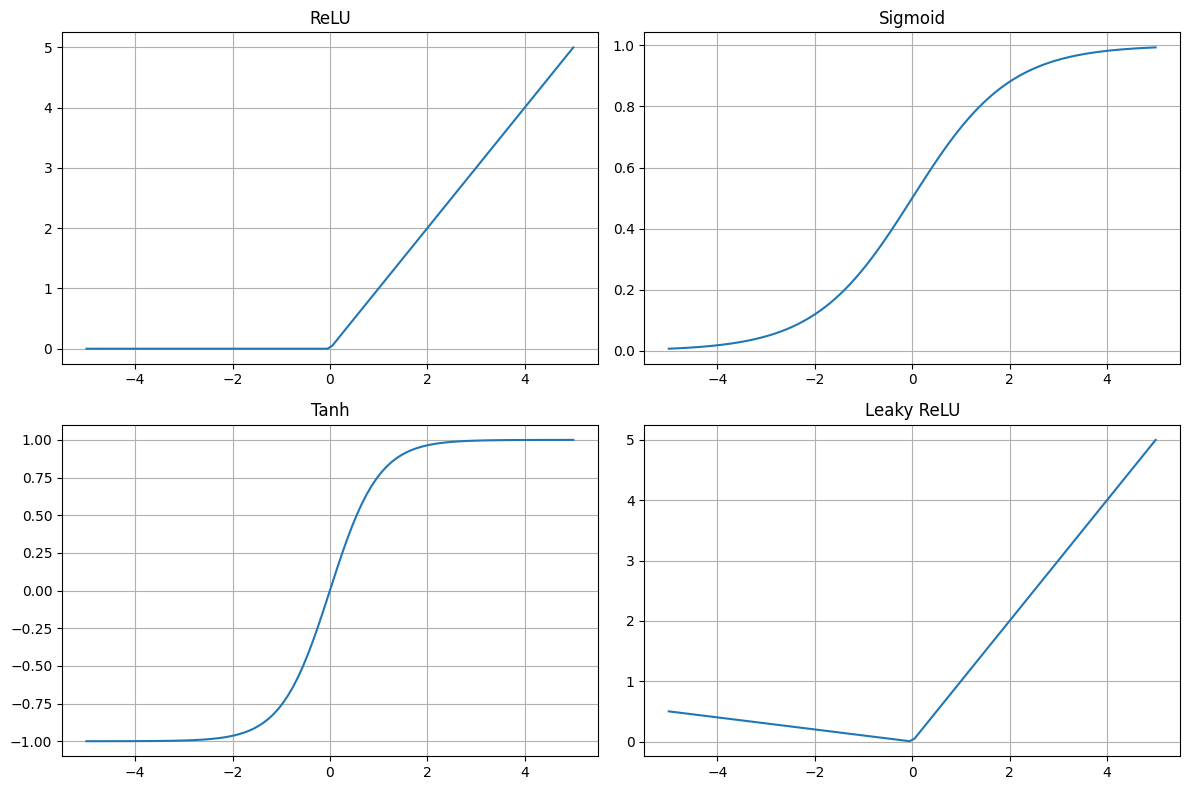

Activation functions introduce non-linearity, allowing networks to learn complex patterns!


In [3]:
print("=== Activation Functions ===")

# Sample input
x = torch.linspace(-5, 5, 100)

# Common activation functions
relu = F.relu(x)
sigmoid = torch.sigmoid(x)
tanh = torch.tanh(x)
leaky_relu = F.leaky_relu(x, negative_slope=-0.1)

# Plotting activation functions
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1) 
plt.plot(x.numpy(), relu.numpy())
plt.title('ReLU')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(x.numpy(), sigmoid.numpy())
plt.title('Sigmoid')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(x.numpy(), tanh.numpy())
plt.title('Tanh')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(x.numpy(), leaky_relu.numpy())
plt.title('Leaky ReLU')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Activation functions introduce non-linearity, allowing networks to learn complex patterns!")

In [4]:
print("=== Linear Layers (Fully Connected) ===")

# Create a linear layer: input_size=3, output_size=2
linear_layer = nn.Linear(3, 2)

print(f"Linear layer: {linear_layer}")
print(f"Weight shape: {linear_layer.weight.shape}")  # [output_size, input_size]
print(f"Bias shape: {linear_layer.bias.shape}")      # [output_size]

# Sample input: batch_size=4, input_features=3
sample_input = torch.randn(4, 3)
print(f"\nInput shape: {sample_input.shape}")

# Forward pass
output = linear_layer(sample_input)
print(f"Output shape: {output.shape}")
print(f"Output:\n{output}")

# The linear transformation is: output = input @ weight.T + bias
print(f"\nManual calculation (should match):")
manual_output = sample_input @ linear_layer.weight.T + linear_layer.bias
print(f"Manual output:\n{manual_output}")
print(f"Difference: {torch.max(torch.abs(output - manual_output))}")  # Should be very small

=== Linear Layers (Fully Connected) ===
Linear layer: Linear(in_features=3, out_features=2, bias=True)
Weight shape: torch.Size([2, 3])
Bias shape: torch.Size([2])

Input shape: torch.Size([4, 3])
Output shape: torch.Size([4, 2])
Output:
tensor([[ 1.1277,  0.7896],
        [ 0.6481, -0.1119],
        [ 0.0853,  1.1358],
        [-0.3499, -0.6480]], grad_fn=<AddmmBackward0>)

Manual calculation (should match):
Manual output:
tensor([[ 1.1277,  0.7896],
        [ 0.6481, -0.1119],
        [ 0.0853,  1.1358],
        [-0.3499, -0.6480]], grad_fn=<AddBackward0>)
Difference: 0.0


## 4. Building a Complete Neural Network

Now let's build a more comprehensive neural network and understand each component:

In [5]:
class ImprovedNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.2):
        super(ImprovedNet, self).__init__()
        
        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
        # Dropout for regularization
        self.dropout = nn.Dropout(dropout_rate)
        
        # Batch normalization
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        
    def forward(self, x):
        # First layer with batch norm and dropout
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        # Second layer with batch norm and dropout
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        # Output layer (no activation for regression, or add softmax for classification)
        x = self.fc3(x)
        return x

# Create the network
model = ImprovedNet(input_size=10, hidden_size=64, output_size=1)
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nTotal parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")

# Test with sample data
sample_input = torch.randn(32, 10)  # Batch of 32 samples, 10 features each
output = model(sample_input)
print(f"\nInput shape: {sample_input.shape}")
print(f"Output shape: {output.shape}")

ImprovedNet(
  (fc1): Linear(in_features=10, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

Total parameters: 5185
Trainable parameters: 5185

Input shape: torch.Size([32, 10])
Output shape: torch.Size([32, 1])


## 5. Training a Neural Network

Training involves:
1. **Forward Pass**: Input data flows through the network to produce predictions
2. **Loss Calculation**: Measure how far off our predictions are
3. **Backward Pass**: Calculate gradients using backpropagation
4. **Parameter Update**: Adjust weights and biases using an optimizer

Let's create a complete training example with synthetic data:

In [6]:
# Generate synthetic dataset for regression
torch.manual_seed(42)  # For reproducibility

# Create a non-linear function: y = sin(x1) + cos(x2) + 0.1*noise
n_samples = 1000
n_features = 2

X = torch.randn(n_samples, n_features)
y = torch.sin(X[:, 0]) + torch.cos(X[:, 1]) + 0.1 * torch.randn(n_samples)
y = y.unsqueeze(1)  # Make it a column vector

print(f"Dataset shapes - X: {X.shape}, y: {y.shape}")

# Split into train/test
train_size = int(0.8 * n_samples)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Train set - X: {X_train.shape}, y: {y_train.shape}")
print(f"Test set - X: {X_test.shape}, y: {y_test.shape}")

# Create model, loss function, and optimizer
model = ImprovedNet(input_size=2, hidden_size=32, output_size=1, dropout_rate=0.1)
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.01)

print(f"\nModel: {model}")
print(f"Loss function: {criterion}")
print(f"Optimizer: {optimizer}")

# Training loop
num_epochs = 100
train_losses = []
test_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set model to training mode
    
    # Forward pass
    train_pred = model(X_train)
    train_loss = criterion(train_pred, y_train)
    
    # Backward pass
    optimizer.zero_grad()  # Clear gradients
    train_loss.backward()  # Compute gradients
    optimizer.step()       # Update parameters
    
    # Evaluation phase
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation for efficiency
        test_pred = model(X_test)
        test_loss = criterion(test_pred, y_test)
    
    # Store losses
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    
    # Print progress
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

print("Training completed!")

Dataset shapes - X: torch.Size([1000, 2]), y: torch.Size([1000, 1])
Train set - X: torch.Size([800, 2]), y: torch.Size([800, 1])
Test set - X: torch.Size([200, 2]), y: torch.Size([200, 1])

Model: ImprovedNet(
  (fc1): Linear(in_features=2, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Loss function: MSELoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

Starting training...
Epoch [20/100], Train Loss: 0.0739, Test Loss: 0.1164
Epoch [40/100], Train L

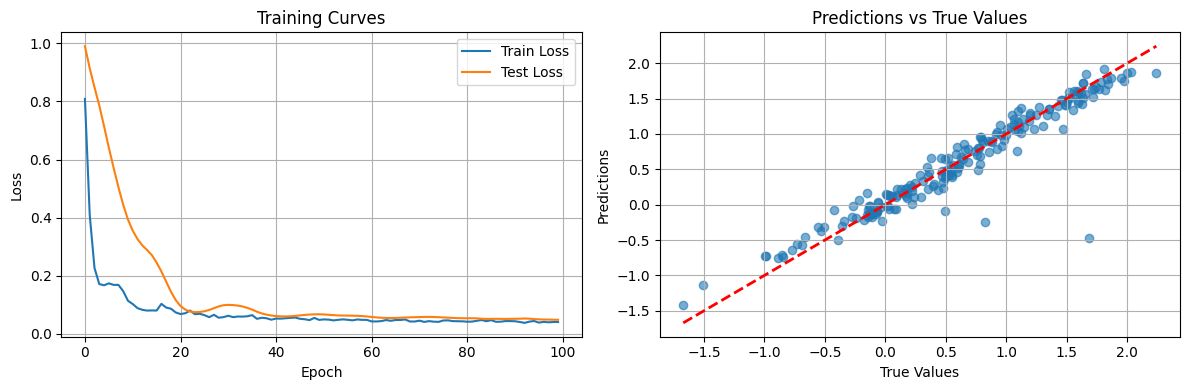


Final Results:
Train MSE: 0.0208, Train R²: 0.9672
Test MSE: 0.0486, Test R²: 0.9153
Test RMSE: 0.2206


In [7]:
# Plot training curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Curves')
plt.legend()
plt.grid(True)

# Plot predictions vs actual
model.eval()
with torch.no_grad():
    test_pred = model(X_test)

plt.subplot(1, 2, 2)
plt.scatter(y_test.numpy(), test_pred.numpy(), alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate final metrics
with torch.no_grad():
    final_train_pred = model(X_train)
    final_test_pred = model(X_test)
    
    train_mse = criterion(final_train_pred, y_train)
    test_mse = criterion(final_test_pred, y_test)
    
    # Calculate R² score
    def r2_score(y_true, y_pred):
        ss_res = torch.sum((y_true - y_pred) ** 2)
        ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
        return 1 - (ss_res / ss_tot)
    
    train_r2 = r2_score(y_train, final_train_pred)
    test_r2 = r2_score(y_test, final_test_pred)

print(f"\nFinal Results:")
print(f"Train MSE: {train_mse:.4f}, Train R²: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}")
print(f"Test RMSE: {torch.sqrt(test_mse):.4f}")

## 6. Classification Example

Let's also see how to build a neural network for classification tasks:

Classification dataset - X: torch.Size([999, 2]), y: torch.Size([999])
Classes: tensor([0, 1, 2])
Epoch [20/100], Train Acc: 0.9887, Test Acc: 0.9850
Epoch [40/100], Train Acc: 0.9937, Test Acc: 0.9800
Epoch [60/100], Train Acc: 0.9937, Test Acc: 0.9800
Epoch [80/100], Train Acc: 0.9950, Test Acc: 0.9850
Epoch [100/100], Train Acc: 0.9975, Test Acc: 0.9850


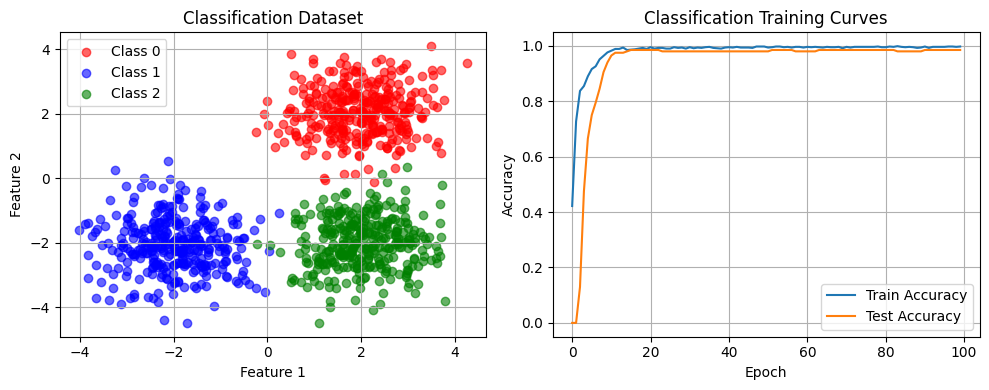


Final Test Accuracy: 0.9850


In [8]:
# Classification Neural Network
class ClassificationNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ClassificationNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)  # No softmax here - CrossEntropyLoss includes it
        return x

# Generate classification dataset (2D circular patterns)
torch.manual_seed(42)
n_samples = 1000
n_classes = 3

# Create 3 clusters
centers = torch.tensor([[2, 2], [-2, -2], [2, -2]], dtype=torch.float32)
X_class = []
y_class = []

for i in range(n_classes):
    # Generate points around each center
    cluster_size = n_samples // n_classes
    cluster_X = centers[i] + 0.8 * torch.randn(cluster_size, 2)
    cluster_y = torch.full((cluster_size,), i, dtype=torch.long)
    
    X_class.append(cluster_X)
    y_class.append(cluster_y)

X_class = torch.cat(X_class, dim=0)
y_class = torch.cat(y_class, dim=0)

print(f"Classification dataset - X: {X_class.shape}, y: {y_class.shape}")
print(f"Classes: {torch.unique(y_class)}")

# Split data
train_size = int(0.8 * len(X_class))
X_train_class = X_class[:train_size]
y_train_class = y_class[:train_size]
X_test_class = X_class[train_size:]
y_test_class = y_class[train_size:]

# Visualize the dataset
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green']
for i in range(n_classes):
    mask = y_class == i
    plt.scatter(X_class[mask, 0], X_class[mask, 1], c=colors[i], label=f'Class {i}', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Dataset')
plt.legend()
plt.grid(True)

# Train classification model
clf_model = ClassificationNet(input_size=2, hidden_size=32, num_classes=3)
clf_criterion = nn.CrossEntropyLoss()  # For multi-class classification
clf_optimizer = optim.Adam(clf_model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training
    clf_model.train()
    train_outputs = clf_model(X_train_class)
    train_loss = clf_criterion(train_outputs, y_train_class)
    
    clf_optimizer.zero_grad()
    train_loss.backward()
    clf_optimizer.step()
    
    # Calculate accuracy
    with torch.no_grad():
        clf_model.eval()
        
        # Training accuracy
        train_pred = torch.argmax(train_outputs, dim=1)
        train_acc = (train_pred == y_train_class).float().mean()
        train_accuracies.append(train_acc.item())
        
        # Test accuracy
        test_outputs = clf_model(X_test_class)
        test_pred = torch.argmax(test_outputs, dim=1)
        test_acc = (test_pred == y_test_class).float().mean()
        test_accuracies.append(test_acc.item())
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

# Plot training curves
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Classification Training Curves')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\nFinal Test Accuracy: {test_accuracies[-1]:.4f}")

## 7. Best Practices and Tips

### Key Concepts to Remember:

1. **Model Architecture**:
   - Start simple and gradually increase complexity
   - Use appropriate activation functions (ReLU is often a good default)
   - Consider dropout for regularization
   - Batch normalization can help with training stability

2. **Training Process**:
   - **Loss Functions**: MSE for regression, CrossEntropyLoss for classification
   - **Optimizers**: Adam is often a good starting point
   - **Learning Rate**: Start with 0.001-0.01, adjust based on performance
   - **Batch Size**: Typically 32, 64, 128, or 256

3. **Regularization Techniques**:
   - **Dropout**: Randomly sets some neurons to zero during training
   - **Weight Decay**: L2 regularization to prevent overfitting
   - **Early Stopping**: Stop training when validation loss stops improving

4. **Monitoring Training**:
   - Always split data into train/validation/test sets
   - Plot training curves to detect overfitting
   - Use metrics appropriate for your problem (accuracy, F1-score, R², etc.)

### Common Issues and Solutions:

In [9]:
print("=== Debugging and Troubleshooting Tips ===")

# 1. Check tensor shapes
def check_shapes():
    x = torch.randn(32, 10)
    model = nn.Linear(10, 5)
    try:
        output = model(x)
        print(f"✓ Success: Input {x.shape} -> Output {output.shape}")
    except RuntimeError as e:
        print(f"✗ Shape error: {e}")

check_shapes()

# 2. Gradient flow check
def check_gradients(model):
    for name, param in model.named_parameters():
        if param.grad is not None:
            grad_norm = param.grad.norm()
            print(f"{name}: grad_norm = {grad_norm:.6f}")
        else:
            print(f"{name}: No gradient")

# 3. Learning rate scheduling
print("\n=== Learning Rate Scheduling ===")
model = nn.Linear(2, 1)
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

print("Learning rate schedule:")
for epoch in range(100):
    if epoch % 25 == 0:
        print(f"Epoch {epoch}: LR = {optimizer.param_groups[0]['lr']:.6f}")
    scheduler.step()

# 4. Common problems and solutions
print("\n=== Common Problems ===")
print("Problem: Loss not decreasing")
print("Solutions:")
print("- Check learning rate (too high/low)")
print("- Verify data preprocessing")
print("- Check for gradient vanishing/exploding")
print("- Ensure proper loss function")

print("\nProblem: Overfitting")
print("Solutions:")
print("- Add dropout")
print("- Reduce model complexity")
print("- Add regularization")
print("- Get more data")

print("\nProblem: Underfitting")
print("Solutions:")
print("- Increase model complexity")
print("- Train for more epochs")
print("- Reduce regularization")
print("- Check data quality")

# 5. Save and load models
print("\n=== Model Saving/Loading ===")
# Save model
torch.save(model.state_dict(), 'model_weights.pth')
print("Model saved!")

# Load model
new_model = nn.Linear(2, 1)
new_model.load_state_dict(torch.load('model_weights.pth'))
print("Model loaded!")

# Clean up
import os
if os.path.exists('model_weights.pth'):
    os.remove('model_weights.pth')

=== Debugging and Troubleshooting Tips ===
✓ Success: Input torch.Size([32, 10]) -> Output torch.Size([32, 5])

=== Learning Rate Scheduling ===
Learning rate schedule:
Epoch 0: LR = 0.010000
Epoch 25: LR = 0.010000
Epoch 50: LR = 0.001000
Epoch 75: LR = 0.000100

=== Common Problems ===
Problem: Loss not decreasing
Solutions:
- Check learning rate (too high/low)
- Verify data preprocessing
- Check for gradient vanishing/exploding
- Ensure proper loss function

Problem: Overfitting
Solutions:
- Add dropout
- Reduce model complexity
- Add regularization
- Get more data

Problem: Underfitting
Solutions:
- Increase model complexity
- Train for more epochs
- Reduce regularization
- Check data quality

=== Model Saving/Loading ===
Model saved!
Model loaded!


/Users/qsong/Documents/GitHub/foo2/.venv/lib/python3.13/site-packages/torch/optim/lr_scheduler.py:182: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


## 8. Summary and Next Steps

### What You've Learned:

1. **PyTorch Fundamentals**: Tensors, autograd, and basic operations
2. **Neural Network Components**: Layers, activation functions, loss functions
3. **Building Models**: Creating custom neural network classes
4. **Training Process**: Forward pass, loss calculation, backpropagation, optimization
5. **Both Regression and Classification**: Complete examples with evaluation
6. **Best Practices**: Regularization, monitoring, debugging

### Next Steps to Continue Learning:

1. **Convolutional Neural Networks (CNNs)**:
   - Image classification and computer vision
   - Convolution layers, pooling, feature maps

2. **Recurrent Neural Networks (RNNs)**:
   - Sequence data and time series
   - LSTM, GRU for long-term dependencies

3. **Advanced Topics**:
   - Transfer learning
   - Generative models (GANs, VAEs)
   - Transformer architectures
   - PyTorch Lightning for scaling

4. **Real-World Projects**:
   - Image classification with CIFAR-10
   - Text classification with real datasets
   - Time series forecasting
   - Building web applications with your models

### Useful Resources:
- PyTorch Official Documentation: https://pytorch.org/docs/
- PyTorch Tutorials: https://pytorch.org/tutorials/
- Deep Learning Book: https://www.deeplearningbook.org/
- Papers With Code: https://paperswithcode.com/

**Happy Learning! 🚀**